In [1]:
import numpy as np
from TMDP import TMDP
from River_swim import River

from algorithms import *
from model_functions import *
import matplotlib as mpl
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)
import math
from utils import *

In [2]:
# Test with tau=0.9
nS = 8
nA = 2
seed = 3231
status_step = 100
gamma = 0.9
river = River(nS, gamma, 5, 1000)
tau = 0.9
xi = np.ones(river.nS)*1/river.nS
tmdp = TMDP(river, xi, tau, gamma, seed)

In [3]:
# Optimal Q function
r_s_a = compute_r_s_a(tmdp.nS, tmdp.nA, tmdp.P_mat, tmdp.reward)
Q_star = bellman_optimal_q(tmdp.nS, tmdp.nA, tmdp.P_mat, tmdp.reward, 1e-4, gamma)
J_star = get_expected_avg_reward(tmdp.P_mat, get_policy(Q_star), tmdp.reward, tmdp.gamma, tmdp.mu)
delta_q = np.linalg.norm(Q_star - Q_star, np.inf)

In [4]:
"""
taus = [0.9, 0.4, 0.3, 0.08, 0.04, 0.03, 0.02, 0.01]
intermediate_results = {}
curr_j = []
delta_qs = []
# Learning from scratch with different values of tau
for tau in taus:
    tmdp = TMDP(river, xi, tau, gamma)
    Q = np.zeros((tmdp.nS, tmdp.nA))
    M = 20000
    
    s = tmdp.reset()
    ret = 0
    a = eps_greedy(s, Q, 1., tmdp.allowed_actions[s.item()])
    Q, inner_J, inner_delta_qs = Q_learning(tmdp, s, a, Q, Q_star, M, alpha = alpha, status_step=status_step)
    intermediate_results['tau_'+str(tau)] = {'J': inner_J, "delta_q":inner_delta_qs}
    delta_q = np.linalg.norm(Q_star - Q, np.inf)
   
for i, key in enumerate(intermediate_results.keys()):
    xmax = len(intermediate_results[key]['J'])*status_step
    x = np.linspace(0, xmax, num=len(intermediate_results[key]['J']))
    y = intermediate_results[key]['J']
    plt.figure(figsize=(9, 4))
    plt.scatter(x, y, c='orange', label='Current J')
    plt.hlines(y=J_star, xmin=0, xmax=xmax, colors=['green'], label='Optimal J')
    plt.plot(x, y)
    plt.grid(visible=True)
    plt.legend(loc="lower right")
    plt.xlabel('#Iterations')
    plt.ylabel('Expected discounted sum of returns')
    plt.title('Learning curves for '+str(key))"""

'\ntaus = [0.9, 0.4, 0.3, 0.08, 0.04, 0.03, 0.02, 0.01]\nintermediate_results = {}\ncurr_j = []\ndelta_qs = []\n# Learning from scratch with different values of tau\nfor tau in taus:\n    tmdp = TMDP(river, xi, tau, gamma)\n    Q = np.zeros((tmdp.nS, tmdp.nA))\n    M = 20000\n    \n    s = tmdp.reset()\n    ret = 0\n    a = eps_greedy(s, Q, 1., tmdp.allowed_actions[s.item()])\n    Q, inner_J, inner_delta_qs = Q_learning(tmdp, s, a, Q, Q_star, M, alpha = alpha, status_step=status_step)\n    intermediate_results[\'tau_\'+str(tau)] = {\'J\': inner_J, "delta_q":inner_delta_qs}\n    delta_q = np.linalg.norm(Q_star - Q, np.inf)\n   \nfor i, key in enumerate(intermediate_results.keys()):\n    xmax = len(intermediate_results[key][\'J\'])*status_step\n    x = np.linspace(0, xmax, num=len(intermediate_results[key][\'J\']))\n    y = intermediate_results[key][\'J\']\n    plt.figure(figsize=(9, 4))\n    plt.scatter(x, y, c=\'orange\', label=\'Current J\')\n    plt.hlines(y=J_star, xmin=0, xmax=xmax


New value of alpha:  0

New value of alpha:  1e-08

New value of alpha:  1e-07

New value of alpha:  1e-06

New value of alpha:  1e-05

New value of alpha:  0.0001

New value of alpha:  0.001

New value of alpha:  0.01

New value of alpha:  0.02

New value of alpha:  0.03

New value of alpha:  0.04

New value of alpha:  0.05

New value of alpha:  0.06

New value of alpha:  0.07

New value of alpha:  0.08

New value of alpha:  0.09

New value of alpha:  0.1


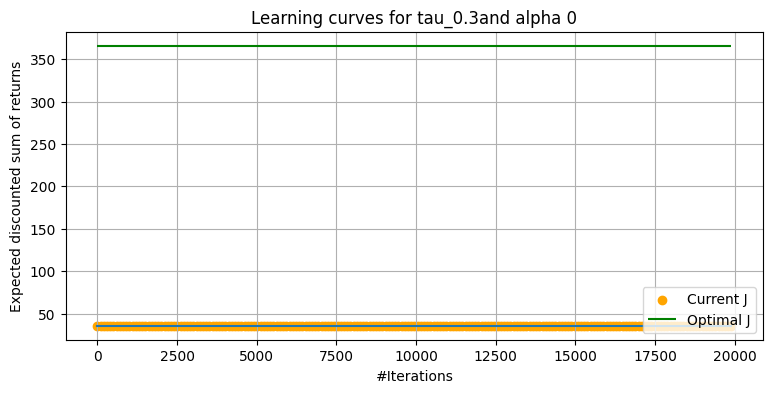

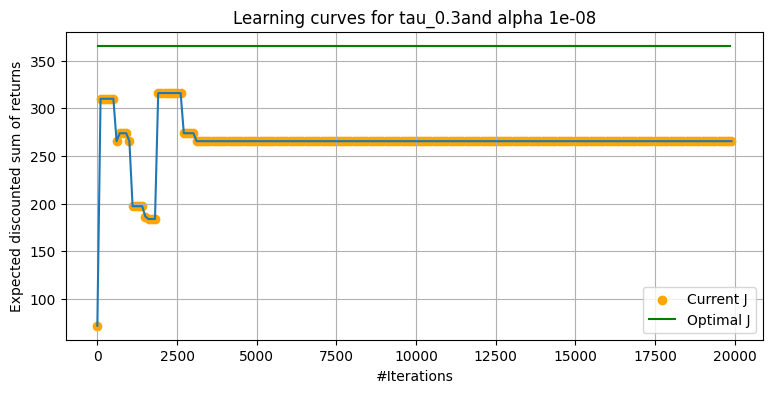

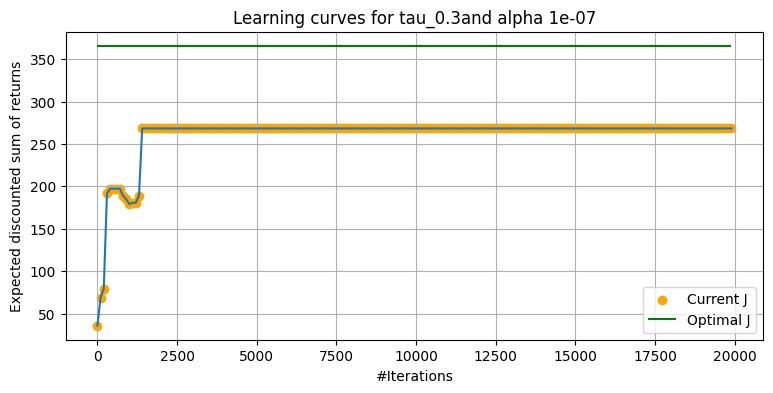

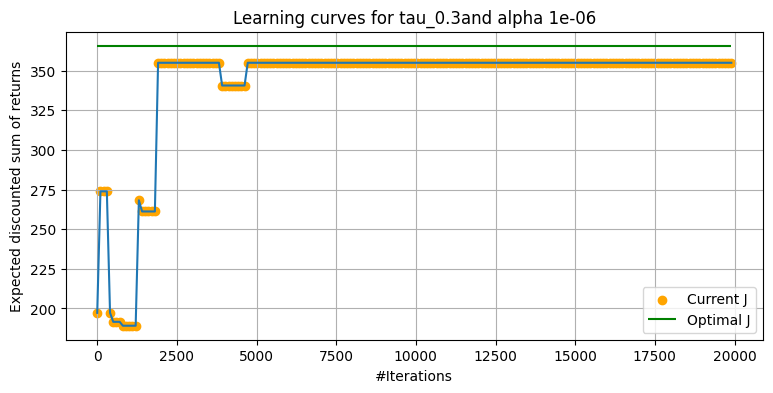

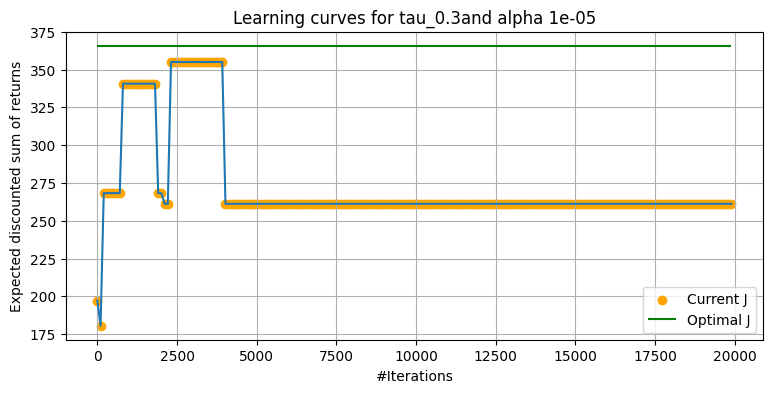

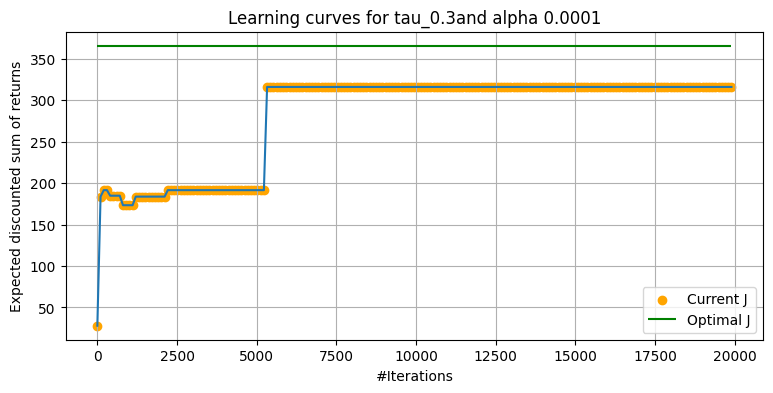

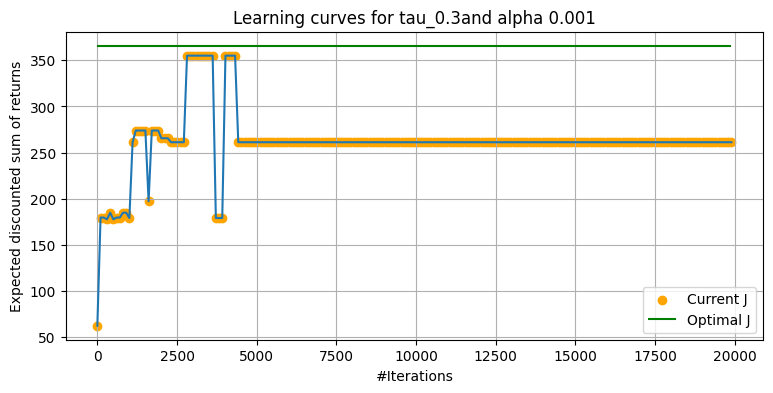

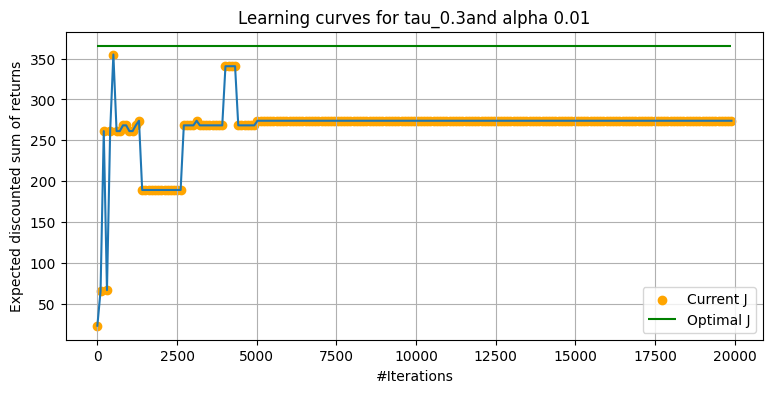

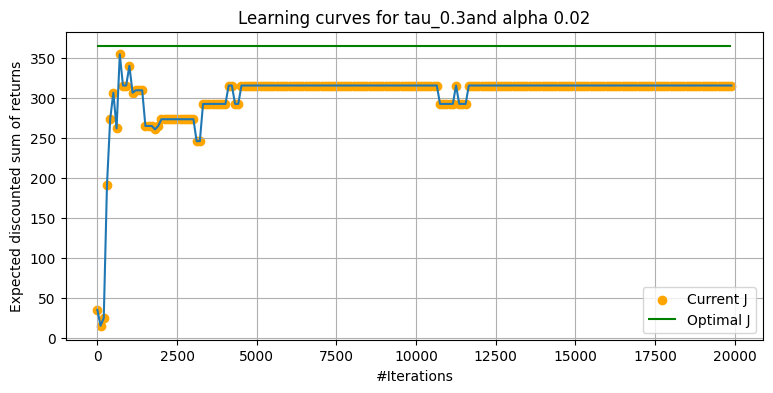

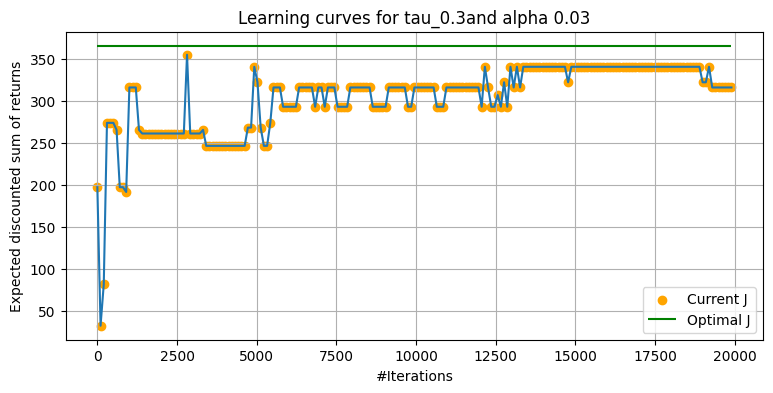

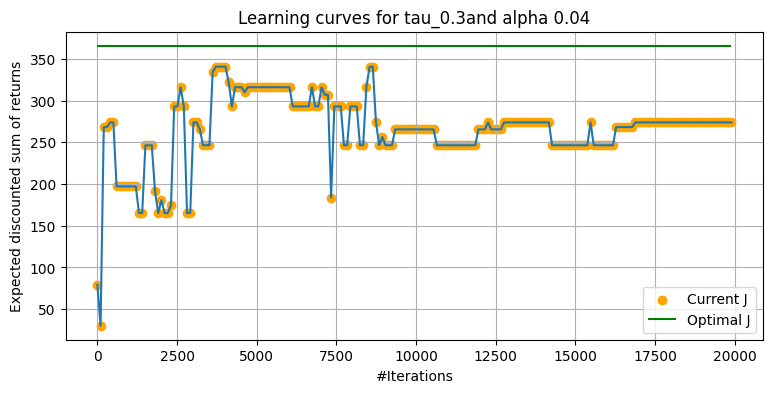

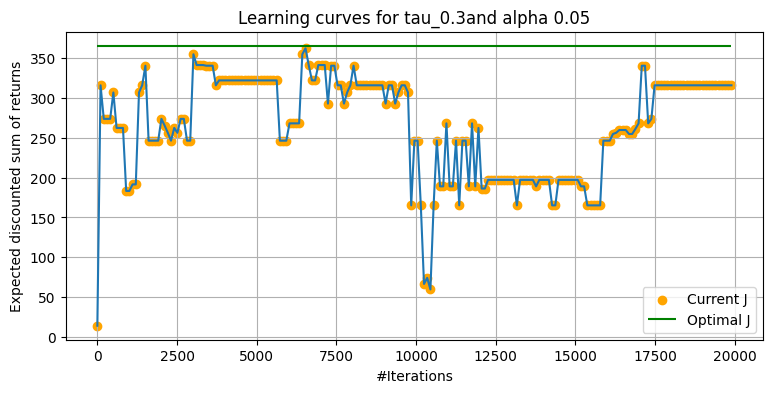

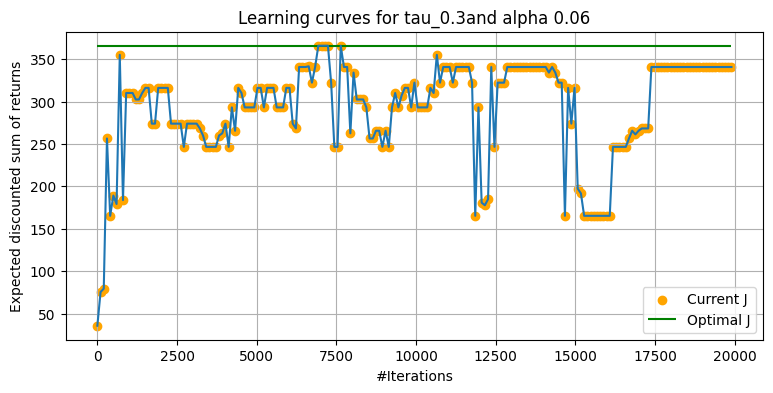

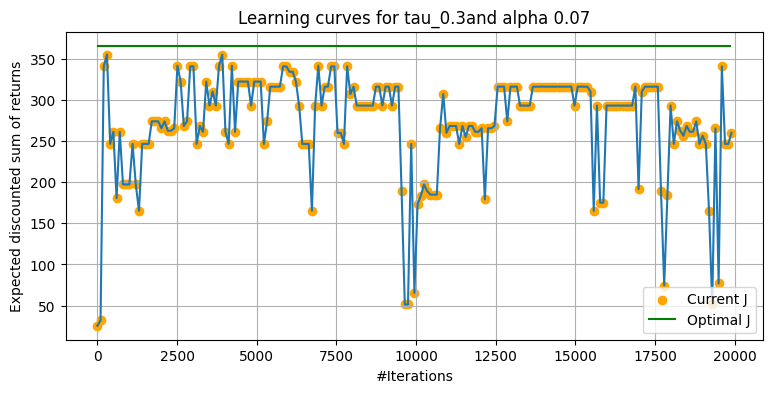

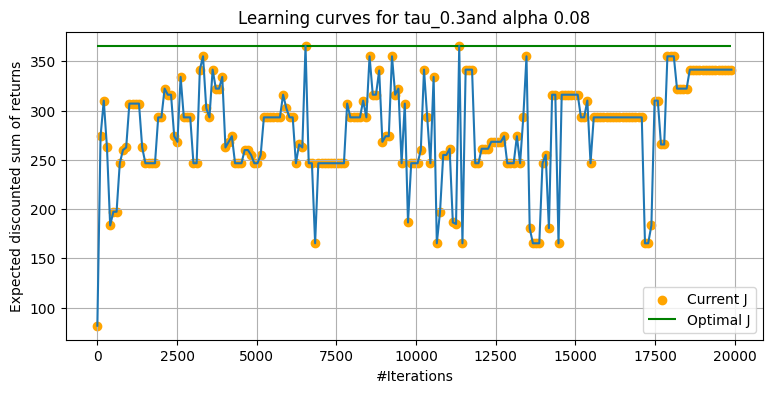

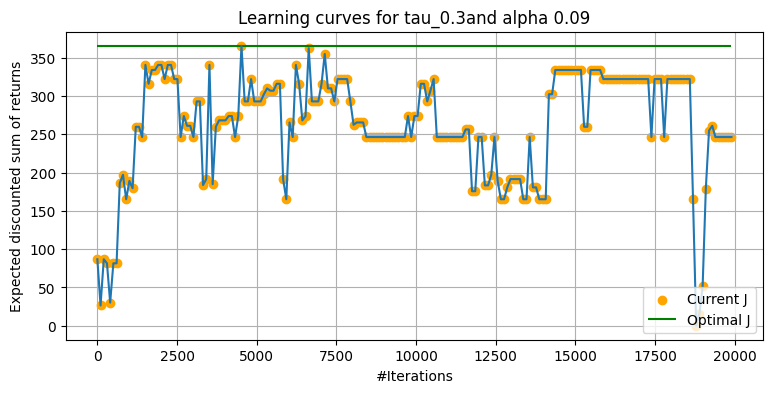

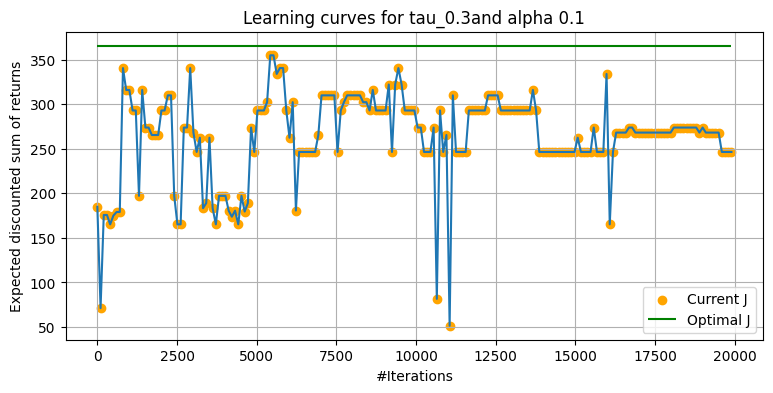

In [5]:

#alphas = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
alphas = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.02, 0.03, 0.04 , 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

#taus = [0.9, 0.4, 0.3, 0.08, 0.04, 0.03, 0.02, 0.01]
taus = [0.3]

# Learning from scratch with different values of tau
for alpha in alphas:
    print("\nNew value of alpha: ", alpha)
    intermediate_results = {}
    curr_j = []
    delta_qs = []
    for tau in taus:
        tmdp = TMDP(river, xi, tau, gamma)
        Q = np.zeros((tmdp.nS, tmdp.nA))
        M = 20000
        
        s = tmdp.reset()
        ret = 0
        a = eps_greedy(s, Q, 1., tmdp.allowed_actions[s.item()])
        Q, inner_J, inner_delta_qs = Q_learning(tmdp, s, a, Q, Q_star, M=M, alpha = alpha, status_step=status_step, debug=False)
        intermediate_results['tau_'+str(tau)] = {'J': inner_J, "delta_q":inner_delta_qs}
        delta_q = np.linalg.norm(Q_star - Q, np.inf)
   
    for i, key in enumerate(intermediate_results.keys()):
        xmax = len(intermediate_results[key]['J'])*status_step
        x = np.linspace(0, xmax, num=len(intermediate_results[key]['J']))
        y = intermediate_results[key]['J']
        plt.figure(figsize=(9, 4))
        plt.scatter(x, y, c='orange', label='Current J')
        plt.hlines(y=J_star, xmin=0, xmax=xmax, colors=['green'], label='Optimal J')
        plt.plot(x, y)
        plt.grid(visible=True)
        plt.legend(loc="lower right")
        plt.xlabel('#Iterations')
        plt.ylabel('Expected discounted sum of returns')
        plt.title('Learning curves for ' + str(key) + "and alpha " + str(alpha))

In [6]:
print(alpha)

0.1
